## Technical Exercise for Data Scientist Candidates

##### Author: Wenli Zhang
##### Date: Aug 2021

## Content

1. [Import libraries](#libraries)
1. [Question List](#Question_List)


## 1. Import libraries

<a id='libraries'></a>

In [162]:
! pip install nodejs

  Created wheel for nodejs: filename=nodejs-0.1.1-py3-none-any.whl size=3492 sha256=6e918ed1b7d9a09b1e512575cee8d62234794d4be39a387d0abfd53aa147ee6e
  Stored in directory: c:\users\wzhang\appdata\local\pip\cache\wheels\b3\ce\d8\40f8634e964582985b2c4560cbba06d4f50d3da980fccd0497
  Created wheel for optional-django: filename=optional_django-0.1.0-py3-none-any.whl size=9980 sha256=e74249ce4f2f75038dd5990419e202a11ea8e7c3e6c641da1eb8ef665616f479
  Stored in directory: c:\users\wzhang\appdata\local\pip\cache\wheels\3b\42\9c\10c5c4021a4edf8416f18e88b427b92e99f187e61e15e08100
Successfully built nodejs optional-django


In [160]:
! pip install ipywidgets

In [1]:
import pandas as pd
import numpy as np



# Reports
import plotly
#import chart_studio
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
#import plotly.express as px
#import plotly.figure_factory as ff
#import plotly.io as pio
#pio.renderers.default = "svg" # for plotly report to show as image in github

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2. Question List

<a id='Question_List'></a>


1. [Rank top 3 Breweries which produce the strongest beers?](#Q1)
1. [Which year did beers enjoy the highest ratings?](#Q2)
1. [Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?](#Q3)
1. [If you were to recommend 3 beers to your friends based on this data which ones will you recommend?](#Q4)
1. [Which Beer style seems to be the favorite based on reviews written by users?](#Q5)
1. [How does written review compare to overall review score for the beer styles?](#Q6)
1. [How do find similar beer drinkers by using written reviews only? ](#Q7)

In [2]:
dfbeer=pd.read_csv('BeerDataScienceProject_small.csv',encoding = "ISO-8859-1")
dfbeer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [3]:
dfbeer[['beer_name','review_appearance','review_overall']].iplot(kind='box', dimensions=(700, 500), 
   title='Overall Beer Rating between 1998-2012',xTitle='Year',yTitle='Beer Rating (scale of 1-5)')

In [3]:
dfbeer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [4]:
dfbeer.describe(include='all')

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
count,508590.000000,528870.000000,528870.000000,528870,528870,528870.000000,528870.000000,528870.000000,528870.000000,528755,528870.000000,528751,5.288700e+05
unique,NaN,NaN,NaN,18339,104,NaN,NaN,NaN,NaN,22800,NaN,528371,NaN
top,NaN,NaN,NaN,Sierra Nevada Celebration Ale,American IPA,NaN,NaN,NaN,NaN,northyorksammy,NaN,#NAME?,NaN
freq,NaN,NaN,NaN,3000,43369,NaN,NaN,NaN,NaN,1858,NaN,92,NaN
mean,7.017442,22098.466016,2598.423429,NaN,NaN,3.864522,3.758926,3.833197,3.765993,NaN,3.817350,NaN,1.224885e+09
std,2.204460,22158.284352,5281.805350,NaN,NaN,0.604010,0.685335,0.709962,0.669018,NaN,0.718903,NaN,7.605600e+07
min,0.010000,3.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,NaN,8.843904e+08
25%,5.300000,1745.000000,132.000000,NaN,NaN,3.500000,3.500000,3.500000,3.500000,NaN,3.500000,NaN,1.174613e+09
50%,6.500000,14368.000000,394.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,NaN,1.240366e+09
75%,8.500000,40528.000000,1475.000000,NaN,NaN,4.000000,4.000000,4.500000,4.000000,NaN,4.500000,NaN,1.288560e+09


### Key information after data inspection:
#### total record count: 528870
#### beer_style: 104 
#### user: 22800 
#### beer_name: 18339

In [5]:
# get year from utcfromtimestamp
dfbeer['review_year'] = dfbeer.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)
dfbeer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


In [6]:
#check null value
dfbeer.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
review_year               0
dtype: int64

In [7]:
# Since null counts for review_profileName and review_text are in small percentage, and both are needed for questions asked, so simply drop rows involved
dfbeer = dfbeer[dfbeer['review_profileName'].notna() & dfbeer['review_text'].notna()]
dfbeer.shape

(528636, 14)

In [8]:
# There are multiple entries by same user for same beer name, keep only the most recent entry
dfbeer_dup=dfbeer[dfbeer.groupby(['beer_style','beer_name'])['review_time'].transform('count') > 1]
dfbeer_dup.shape

(522273, 14)

In [9]:
# Sort data by review_time descending; keep the first in each unique'review_profileName' + 'beer_name'
dfbeer = dfbeer.sort_values('review_time', ascending=False)
dfbeer = dfbeer.drop_duplicates(subset= ['review_profileName','beer_name'], keep='first')
dfbeer.shape

(522701, 14)

### 1. Rank top 3 Breweries which produce the strongest beers?
<a id='Q1'></a>

In [10]:
dfbeer.groupby(['beer_brewerId'])['beer_ABV'].mean().nlargest(3)

beer_brewerId
6513     19.228824
736      13.750000
24215    12.466667
Name: beer_ABV, dtype: float64

#### <font color='green'>Top 3 Breweries: 6513, 736, 24215 </font>

### 2. Which year did beers enjoy the highest ratings?
<a id='Q2'></a>

#### Amoung all the variables, review_overall is the best to indicate 'rating'

In [11]:
dfbeer.groupby(['review_year'])['review_overall'].mean().nlargest(1)

review_year
2000    4.209677
Name: review_overall, dtype: float64

#### <font color='green'>Year 2000 has the highest beer rating of 4.209677 on average </font>

In [12]:
dfbeerT=pd.crosstab(dfbeer.beer_style,dfbeer.review_year,values=dfbeer.review_overall, aggfunc='mean')
dfbeerT.head()

review_year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
beer_style,,,,,,,,,,,,,,,
Altbier,NaN,4.0,NaN,4.500000,3.928571,3.835570,4.017857,3.989362,3.916284,3.822327,3.790389,3.854400,3.808296,3.861746,3.954545
American Adjunct Lager,3.0,NaN,4.0,2.727273,2.777778,2.882726,3.019512,3.075188,3.068875,3.126223,3.255732,3.296512,3.224060,3.011756,2.928571
American Amber / Red Ale,NaN,4.0,4.0,3.888889,3.765918,3.754967,3.806258,3.841615,3.867147,3.830443,3.847475,3.926081,3.862250,3.840768,3.708738
American Amber / Red Lager,NaN,NaN,NaN,3.100000,3.247059,3.225806,3.442408,3.445607,3.337366,3.339335,3.344492,3.592932,3.489130,3.249158,3.125000
American Barleywine,4.5,4.5,NaN,3.000000,4.102151,3.875445,3.917772,4.022684,3.911189,3.876325,3.922247,3.899000,3.911872,3.933464,3.969231


#### Graphical representation confirming the result

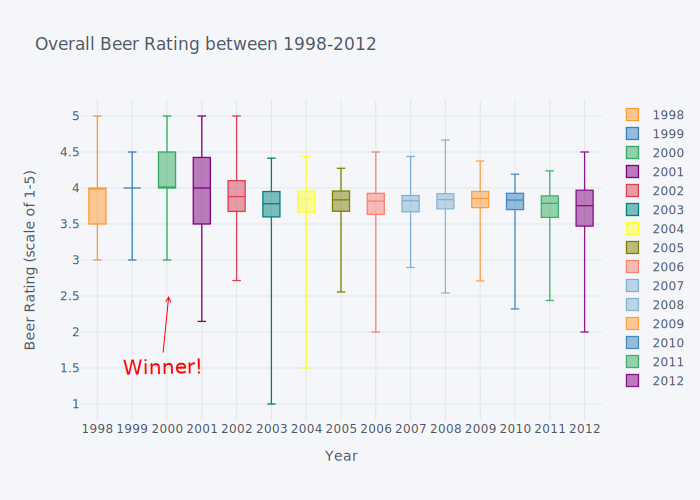

In [13]:
dfbeerT.iplot(kind='box', dimensions=(700, 500), 
   title='Overall Beer Rating between 1998-2012',xTitle='Year',yTitle='Beer Rating (scale of 1-5)', annotations=[{'text':'Winner!','fontsize':20,'fontcolor':'red','x':'0.17','y':'2.5', 'xref':'paper','arrowhead':5, 'textangle':-1,'ay':70,'ax':-7,'arrowcolor':'red'}])

### 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
<a id='Q3'></a>

#### Inspect data

In [14]:
dfbeer_corr = dfbeer[[ 'review_appearance', 'review_palette','review_taste', 'review_aroma', 'review_overall']]
dfbeer_corr.describe()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
count,522701.000000,522701.000000,522701.000000,522701.000000,522701.000000
mean,3.863776,3.757892,3.764885,3.815860,3.831605
std,0.604056,0.685312,0.669081,0.719191,0.710313
min,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.500000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
##### Plot correlation coefficients with hestmap. Tried both spearman correlation and pearson correlation. Results are very similar.

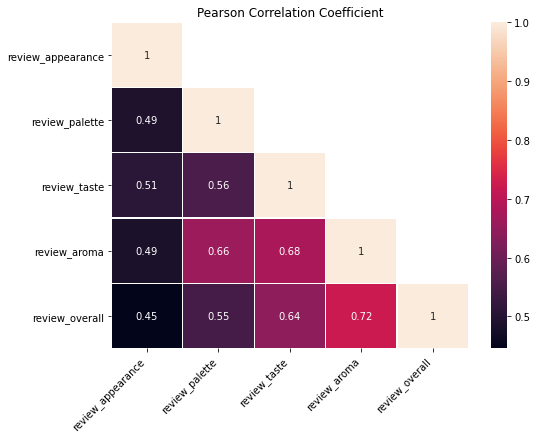

In [155]:
dfbeer_corrM = dfbeer_corr.corr(method='spearman')
umask = np.zeros_like(dfbeer_corrM, dtype=np.bool_)
umask[np.triu_indices_from(umask, k=1)] = True
plt.figure(figsize=(8, 6))
sns.heatmap(dfbeer_corrM, mask=umask, annot=True, linewidths=.3)
tick_marks = np.arange(len(dfbeer_corr.columns))
plt.xticks( tick_marks+0.5,rotation=45,ha='right')
plt.title("Pearson Correlation Coefficient")
plt.show()

#### <font color='green'>Aroma rating has the largest correlation (0.78) with user’s Overall rating. The second is Taste (0.69)</font>

### 4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
<a id='Q4'></a>

#### review_overall is the best variable to use for this recommendation. Check what are the unique values in this dataset

In [73]:
dfbeer["review_overall"].unique()

array([4. , 3. , 4.5, 3.5, 2.5, 5. , 2. , 1.5, 1. , 0. ])

#### Check the review_overall rating distribution using histogram

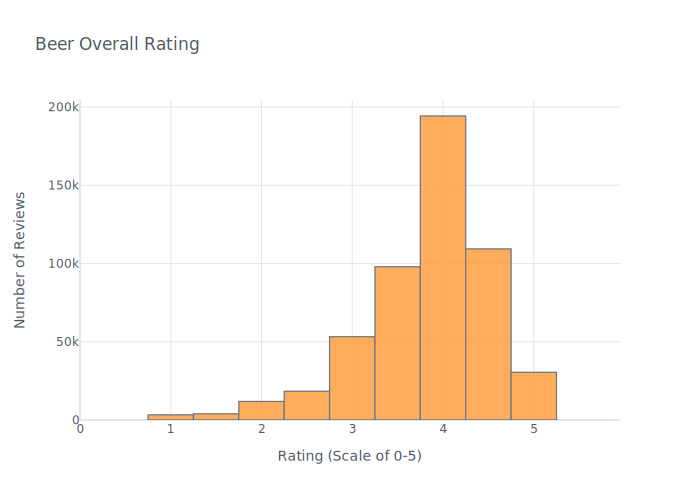

In [77]:
dfbeer["review_overall"].iplot(kind="histogram", bins=(20),xanchor="left", xrange=[0,5.95],theme="white", title="Beer Overall Rating",xTitle='Rating (Scale of 0-5)', yTitle='Number of Reviews')

#### About 26.8% of the users gave rating 4.5 or above

In [78]:
len(dfbeer.query('review_overall >= 4.5' ))/len(dfbeer)

0.2675200544862168

In [ ]:
#### Create two dataframes since we care both mean rating and number of reviews for each beer

In [88]:
dfbeer_review_count =dfbeer[['beer_name','review_overall']].groupby(['beer_name'])['review_overall'].agg([ 'count'])
dfbeer_review_count.head()

,count
beer_name,
"""100"" Pale Ale",1
"""33"" Export",3
"""76"" Anniversary Ale",3
"""76"" Anniversary Ale With English Hops",1
"""Fade To Black"" Porter",1


In [89]:
dfbeer_review_rating =dfbeer[['beer_name','review_overall']].groupby(['beer_name'])['review_overall'].agg([ 'mean'])
dfbeer_review_rating.head()

,mean
beer_name,
"""100"" Pale Ale",4.0
"""33"" Export",3.0
"""76"" Anniversary Ale",4.0
"""76"" Anniversary Ale With English Hops",4.0
"""Fade To Black"" Porter",4.0


In [ ]:
#### Merge the two datasets so each beer_name has both mean rating and total review counts

In [93]:
dfbeer_count_rating=pd.merge(dfbeer_review_count, dfbeer_review_rating, on="beer_name")
dfbeer_count_rating=dfbeer_count_rating.reset_index()
dfbeer_count_rating.head()

,beer_name,count,mean
0,"""100"" Pale Ale",1,4.0
1,"""33"" Export",3,3.0
2,"""76"" Anniversary Ale",3,4.0
3,"""76"" Anniversary Ale With English Hops",1,4.0
4,"""Fade To Black"" Porter",1,4.0


#### Plot the data

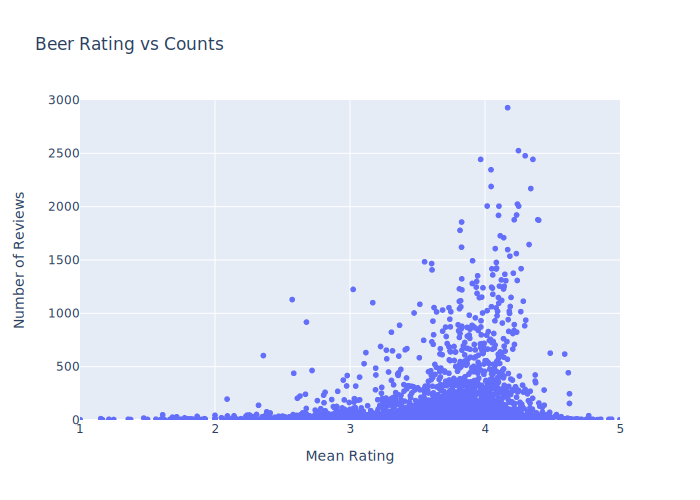

In [101]:
px.scatter(dfbeer_count_rating,  x="mean", y="count", 
            hover_name="beer_name",labels={"mean":'Mean Rating',"count":'Number of Reviews'},
           log_x=False, size_max=55, range_y=[0,3000], range_x=[1, 5],title='Beer Rating vs Counts')

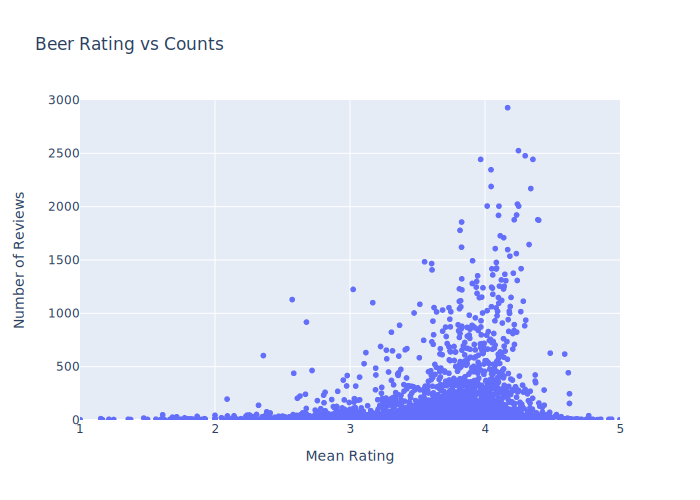

In [163]:
fig=px.scatter(dfbeer_count_rating,  x="mean", y="count", 
            hover_name="beer_name",labels={"mean":'Mean Rating',"count":'Number of Reviews'},
           log_x=False, size_max=55, range_y=[0,3000], range_x=[1, 5],title='Beer Rating vs Counts')
fig.show()

### 5. Which Beer style seems to be the favorite based on reviews written by users?
<a id='Q5'></a>

In [ ]:
dfbeer.groupby(['beer_style'])['review_text_senti'] \
                             .mean() \
                             .reset_index(name='rating') \
                             .sort_values(['rating'], ascending=False) \
                             .head(1)

### 6. How does written review compare to overall review score for the beer styles?
<a id='Q6'></a>

In [140]:
dfcompare = pd.DataFrame()
dfcompare=dfbeer.groupby(['beer_style'])['review_text_senti'] \
                             .mean() \
                             .reset_index(name='text_senti')
dfcompare.head()

,beer_style,text_senti
0,Altbier,0.182301
1,American Adjunct Lager,0.123698
2,American Amber / Red Ale,0.196523
3,American Amber / Red Lager,0.160643
4,American Barleywine,0.180328


In [141]:

dfcompare['overall']=dfbeer.groupby(['beer_style'])['review_overall'] \
                             .mean() \
                             .reset_index(name='overall')['overall']
dfcompare.head()

,beer_style,text_senti,overall
0,Altbier,0.182301,3.873161
1,American Adjunct Lager,0.123698,3.112178
2,American Amber / Red Ale,0.196523,3.854141
3,American Amber / Red Lager,0.160643,3.385453
4,American Barleywine,0.180328,3.919920


#### Review the relationship between written review sentiment polarity and overall review score graphically

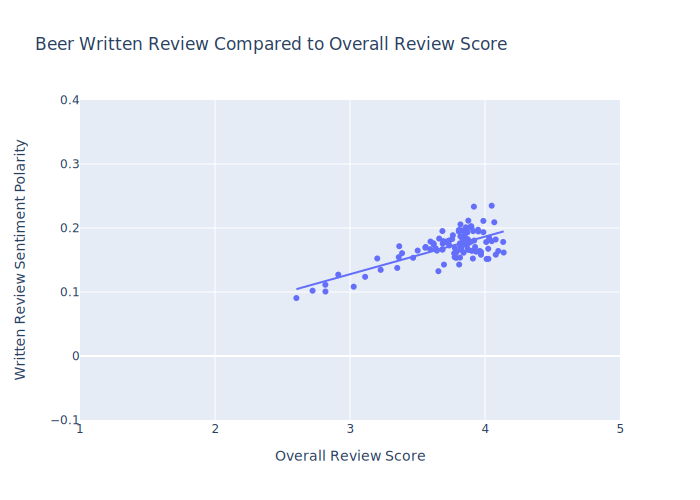

In [161]:
fig=px.scatter(dfcompare,  x="overall", y="text_senti", trendline = 'ols',
            hover_name="beer_style",labels={"overall":'Overall Review Score',"text_senti":'Written Review Sentiment Polarity'},
           log_x=False, size_max=55, range_y=[-.1,.4], range_x=[1, 5],title='Beer Written Review Compared to Overall Review Score')
fig.show("svg")

#### From the plot we can see there is an overall linear relationship between the two. The Spearman correlation coefficient is used since Spearman correlation is less sensitive than the Pearson correlation to outliers

In [151]:
 dfcompare[['text_senti','overall']].corr(method='spearman')

,text_senti,overall
text_senti,1.000000,0.415545
overall,0.415545,1.000000


#### Correlation coefficient of 0.4 indicates there is a positive but low correlation between written review sentiment polarity and overall review score

### 7. How to find similar beer drinkers by using written reviews only?
<a id='Q7'></a>

In [10]:
def clean_text(text):
   # text pre-processing

    text = text.lower()
    
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"\'t", " not", text)
    
    #Spelling correction
    text = TextBlob(text).correct()
    
    # Only keep letters
    #skip this step since it doesn't make difference to the sentimental analysis method used
    
    # Lemmatization
    # can be time consuming
    #skip this step since it doesn't make difference to the sentimental analysis method used
      
    # Remove stop words
    # can be time consuming
    #skip this step since it doesn't make difference to the sentimental analysis method used
    return text

In [105]:
#dfbeer['review_text_clean']=dfbeer['review_text'].apply(lambda text:clean_text(text))
dfbeer['review_text_clean']=dfbeer['review_text']

In [135]:
# Using TextBlob to calculate sentiment polarity in the range of [-1,1]
# 1 = positive sentiment and -1 =negative sentiment
# Also evaluated nltk.sentiment.vader, similar but less coverage
dfbeer[['review_text_senti']] = dfbeer['review_text_clean'].apply(lambda text: TextBlob(text).sentiment.polarity)

#intensityanalyzer = SentimentIntensityAnalyzer()
#dfbeer['review_text_senti'] = dfbeer['review_text_clean'].apply(lambda text: intensityanalyzer.polarity_scores(text)['compound'])


In [136]:
dfbeer.to_csv('review_text_senti.csv')

In [131]:
dfbeer.loc[dfbeer['review_profileName'] == 'Absumaster'][[  'beer_name','review_text_senti']].sort_values(['review_text_senti'], ascending=False)

,beer_name,review_text_senti
321078,Gouyasse Triple,0.418467
100397,Couckelærschen Doedel,0.376122
431467,Andechser Dunkles Weissbier,0.359470
338904,Trappistes Rochefort 8,0.354799
399405,Struis,0.332639
...,...,...
426141,Belzebuth,-0.098864
275086,Hoegaarden Speciale,-0.106346
126277,Duchesse De Bourgogne,-0.111285
110005,Zinnebir,-0.133333


In [130]:
dfbeer.loc[dfbeer['beer_name'] == 'Hoegaarden Grand Cru'].groupby(['review_profileName','beer_style'])['review_text_senti'].agg(['mean', 'count','max','min'])

,,mean,count,max,min
review_profileName,beer_style,,,,
Absumaster,Belgian Strong Pale Ale,0.289545,1,0.289545,0.289545
AlexLMS,Belgian Strong Pale Ale,0.268757,1,0.268757,0.268757
Andreji,Belgian Strong Pale Ale,0.149951,1,0.149951,0.149951
BeerAngel,Belgian Strong Pale Ale,0.274924,1,0.274924,0.274924
BeerBeing,Belgian Strong Pale Ale,0.304048,1,0.304048,0.304048
...,...,...,...,...,...
thierrynantes,Belgian Strong Pale Ale,0.239583,1,0.239583,0.239583
vancurly,Belgian Strong Pale Ale,0.300000,1,0.300000,0.300000
wagenvolks,Belgian Strong Pale Ale,-0.033333,1,-0.033333,-0.033333


In [118]:
table = pd.pivot_table(dfbeer, index=['review_profileName'],values='review_text_senti', columns=['beer_style'], aggfunc=np.sum)
table.head()              

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,0.442581,NaN,0.169634,NaN,NaN,NaN,NaN,0.548640,...,NaN,NaN,NaN,NaN,0.162071,NaN,NaN,NaN,NaN,0.264074
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,0.196402,NaN,0.047833,0.417981,NaN,NaN,NaN,0.687819,...,NaN,NaN,NaN,0.259492,0.232556,0.285185,0.22241,0.006852,NaN,NaN
0runkp0s,NaN,-0.023611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# If a user rated more than one beer names within one beer_style, use the mean value
senti_matrix = dfbeer.groupby(['review_profileName','beer_style'])['review_text_senti'].mean().unstack()

In [103]:
senti_matrix.head()

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,0.147527,NaN,0.169634,NaN,NaN,NaN,NaN,0.091440,...,NaN,NaN,NaN,NaN,0.162071,NaN,NaN,NaN,NaN,0.264074
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,0.196402,NaN,0.047833,0.20899,NaN,NaN,NaN,0.171955,...,NaN,NaN,NaN,0.259492,0.232556,0.285185,0.111205,0.006852,NaN,NaN
0runkp0s,NaN,-0.023611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# There are 55 beer drinkers having sentiment.polarity=0 based on their review_text. Since this is 0.2% of total beer drinkers, 0 is not handled before making senti_matrix a sparse.csr_matrix 
senti_matrix[(senti_matrix==0).sum(axis=1)>0]

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profileName,,,,,,,,,,,,,,,,,,,,,
AlexF,NaN,NaN,NaN,NaN,0.235198,NaN,0.280856,0.117330,NaN,NaN,...,0.175919,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-0.150000
Bajasith,NaN,NaN,0.216139,NaN,NaN,NaN,0.167467,0.000000,NaN,0.100000,...,NaN,0.000183,NaN,NaN,NaN,NaN,0.190278,NaN,NaN,0.032414
BaronBeerGoggles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beer4Baltimore,NaN,NaN,0.071905,NaN,0.000000,0.112885,0.084259,NaN,NaN,0.057658,...,0.219583,NaN,NaN,NaN,0.151902,NaN,NaN,NaN,0.268452,0.044048
BenH1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BigJTrucker,NaN,0.009214,0.286280,NaN,0.205299,NaN,NaN,0.166667,NaN,0.228478,...,0.102500,NaN,NaN,0.279861,0.224862,NaN,NaN,NaN,0.139568,0.174211
BoozySmurf,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cavalier92,0.378571,NaN,0.000000,-0.030952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.315580,NaN,NaN,NaN,NaN,NaN
DaleMcMutt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Replace NaN with 0 first, then convert it to sparse.csr_matrix, where 0 values are ignored
senti_matrix=senti_matrix.fillna(0)
sparsem = csr_matrix(senti_matrix)
print("Sparse matrix: \n",sparsem )

Sparse matrix: 
   (0, 2)	0.14752711640211638
  (0, 4)	0.1696338383838384
  (0, 9)	0.0914400806308701
  (0, 10)	0.23076923076923073
  (0, 11)	0.164152862933589
  (0, 12)	0.20608971870520787
  (0, 17)	0.1388888888888889
  (0, 19)	0.11198509711794738
  (0, 20)	0.0946049532478104
  (0, 22)	0.16350000000000003
  (0, 25)	0.11176948051948052
  (0, 29)	0.3755
  (0, 58)	0.1612561728395062
  (0, 60)	0.23551607123035695
  (0, 74)	0.2002450980392157
  (0, 84)	0.1090807194754563
  (0, 89)	0.2285757575757576
  (0, 92)	0.22111685463659148
  (0, 98)	0.16207070707070703
  (0, 103)	0.2640740740740741
  (1, 49)	0.19819548872180454
  (1, 76)	0.11016666666666666
  (1, 93)	0.2394871794871795
  (2, 14)	0.2549444444444444
  (3, 2)	0.19640151515151513
  :	:
  (22785, 15)	0.0878720238095238
  (22785, 16)	0.08660841473341471
  (22785, 17)	0.21827976190476195
  (22785, 39)	0.1919871794871795
  (22785, 49)	0.20946969696969697
  (22785, 58)	0.2204545454545455
  (22785, 60)	0.09073809523809526
  (22785, 61)	0.27686

In [120]:
# SpectralClustering is chosen over K-Means and DBScan since overall it handles high dimensional data and sparse data better
# I used n_clusters=20, didn't find an easy way to do elbow anaylysis using inertia like one in K-Means. 
# My understanding of the reason is that both SpectralClustering and DBScan are not centriod based
# Not sure how to choose best n_clusters?
clustering = SpectralClustering(n_clusters=20,assign_labels="discretize", random_state=0).fit(sparsem)
clustering.labels_
# Not sure if this is correct - index order is preserved?
senti_matrix['cluster']=clustering.labels_

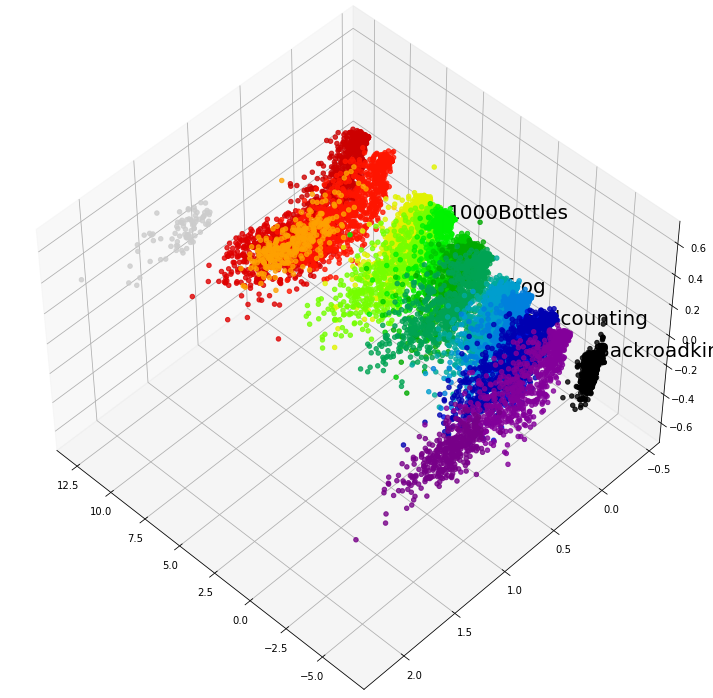

In [137]:
# Not sure if PCA is correctly used here since it doesn't take the sparse matrix sparsem, has to use senti_matrix, where null are filled with 0
# if PCA can't be used, not sure what other plotting options to present the clustering visually?
# last choice could be to display the user list for each cluster in a table

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

pca = PCA(n_components=3)
pca.fit(senti_matrix)
X = pca.transform(senti_matrix)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clustering.labels_, cmap=plt.cm.nipy_spectral,alpha=0.8)

# label beer drinkers to see if they are similar
ax.text(X[701, 0], X[701, 1], X[701, 2], senti_matrix.index[701], size=20, zorder=1,   color='k') 
ax.text(X[114, 0], X[114, 1], X[114, 2], senti_matrix.index[114], size=20, zorder=1,   color='k') 
ax.text(X[91, 0], X[91, 1], X[91, 2], senti_matrix.index[91], size=20, zorder=1,   color='k') 
ax.text(X[6, 0], X[6, 1], X[6, 2], senti_matrix.index[6], size=20, zorder=1,   color='k') 

plt.show()


In [141]:
# Similar beer drinkers can be reviewed by providing a cluster id
senti_matrix_list = senti_matrix.reset_index()
senti_matrix_list[senti_matrix_list['cluster']==11]['review_profileName']

6            1000Bottles
8              100floods
26             13aphomet
76             2roosters
99       40oztofreedom89
              ...       
22409          winters19
22501        wryepicures
22589           xxnite88
22614            yankiac
22716       zassenhausen
Name: review_profileName, Length: 689, dtype: object

In [116]:
dfbeer.groupby(['beer_style'])['review_text_senti'] \
                             .mean() \
                             .reset_index(name='rating') \
                             .sort_values(['rating'], ascending=False) \
                             .head(1)

,beer_style,rating
38,Dortmunder / Export Lager,0.234851


In [133]:
dfbeer.loc[dfbeer['beer_style'] == 'Dortmunder / Export Lager'].groupby(['review_profileName','beer_style'])['review_text_senti'].agg(['mean', 'count','max','min'])

,,mean,count,max,min
review_profileName,beer_style,,,,
1fastz28,Dortmunder / Export Lager,0.189667,1,0.189667,0.189667
49degrees,Dortmunder / Export Lager,0.254733,2,0.353125,0.156341
86MonteSS,Dortmunder / Export Lager,0.253950,1,0.253950,0.253950
86sportster883,Dortmunder / Export Lager,0.201852,1,0.201852,0.201852
ADR,Dortmunder / Export Lager,0.183484,3,0.234115,0.113908
...,...,...,...,...,...
zerk,Dortmunder / Export Lager,0.164526,2,0.340909,-0.011857
zhooker,Dortmunder / Export Lager,0.233968,1,0.233968,0.233968
zimm421,Dortmunder / Export Lager,0.287932,1,0.287932,0.287932
